In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
#read in bookshop data
df = pd.read_csv(r'TotalFictionBookshop_Top_Reads_2022.csv')

In [3]:
#applying correct type to columns 
int_cols = ['YearPublished','NumPages','UnitsSold','Revenue']
float_cols = ['Rating']

#defining data type
df[int_cols] = df[int_cols].astype(int)
df[float_cols] = df[float_cols].astype(float)

In [4]:
#Describe dataset
print(df.columns)
print(df.info())
print(df.describe())
print(df.shape)

Index(['Title', 'YearPublished', 'NumPages', 'Genres', 'Rating', 'Author',
       'UnitsSold', 'Revenue'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          250 non-null    object 
 1   YearPublished  250 non-null    int32  
 2   NumPages       250 non-null    int32  
 3   Genres         250 non-null    object 
 4   Rating         250 non-null    float64
 5   Author         250 non-null    object 
 6   UnitsSold      250 non-null    int32  
 7   Revenue        250 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 11.8+ KB
None
       YearPublished    NumPages      Rating    UnitsSold       Revenue
count     250.000000  250.000000  250.000000   250.000000    250.000000
mean     1958.392000  389.088000    8.249600   281.248000   6769.884000
std        33.258848   97.442271    0.29469

In [5]:
df.head()

,Title,YearPublished,NumPages,Genres,Rating,Author,UnitsSold,Revenue
0,Whispers in the Mist,1924,426,Mystery,9.3,Olivia Hudson,1212,30978
1,Starlight Chronicles,1941,525,Fantasy,9.2,Ethan Lawson,844,26586
2,Beneath the Surface,1967,456,Thriller,9.0,Ava Mitchell,1204,32941
3,Pillars of Creation,1989,606,Science Fiction,9.0,Ethan Lawson,573,20834
4,The Farthest Harbour,1929,462,Adventure,8.9,Liam Parker,930,25779


In [6]:
#decade analysis
decade_input = """
SELECT TITLE, YEARPUBLISHED,
(YEARPUBLISHED/10) * 10 AS DECADE,
NUMPAGES, GENRES, RATING, AUTHOR, UNITSSOLD,
REVENUE
from df
"""

books_output = sqldf(decade_input,locals())
bookshop = pd.DataFrame(books_output)

bookshop

,Title,YearPublished,DECADE,NumPages,Genres,Rating,Author,UnitsSold,Revenue
0,Whispers in the Mist,1924,1920,426,Mystery,9.3,Olivia Hudson,1212,30978
1,Starlight Chronicles,1941,1940,525,Fantasy,9.2,Ethan Lawson,844,26586
2,Beneath the Surface,1967,1960,456,Thriller,9.0,Ava Mitchell,1204,32941
3,Pillars of Creation,1989,1980,606,Science Fiction,9.0,Ethan Lawson,573,20834
4,The Farthest Harbour,1929,1920,462,Adventure,8.9,Liam Parker,930,25779
...,...,...,...,...,...,...,...,...,...
245,Eclipse of Illusions,1928,1920,351,Sci-FiRomance,8.0,Sofia Nelson,76,1600
246,Murmurs of the Forgotten,1906,1900,300,Historical Mystery,8.0,Sebastian Callahan,71,1278
247,Sands of Solace,1949,1940,255,Adventure Romance,8.1,Maya Middleton,54,826
248,Veiled Echoes,1935,1930,387,Psychological Thriller,8.1,Kieran Caldwell,42,975


In [7]:
#check revenue by decade 
gross_by_decade = """
SELECT DECADE, COUNT(TITLE),
SUM(REVENUE) AS TOTAL_REVENUE,
ROUND(AVG(REVENUE),0) AS AVG_REVENUE
FROM bookshop
GROUP BY DECADE
ORDER BY TOTAL_REVENUE DESC
"""

agg_decade = sqldf(gross_by_decade,locals())
agg_decade

,DECADE,COUNT(TITLE),TOTAL_REVENUE,AVG_REVENUE
0,1940,28,228904,8175.0
1,1920,28,198874,7103.0
2,1960,18,178282,9905.0
3,1930,26,143377,5515.0
4,2000,19,137479,7236.0
5,1970,24,132670,5528.0
6,1950,18,120917,6718.0
7,1990,21,118805,5657.0
8,1900,18,111378,6188.0
9,2010,16,110493,6906.0


In [8]:
agg_decade = pd.DataFrame(agg_decade)
agg_decade['DECADE']=agg_decade['DECADE'].astype(str)

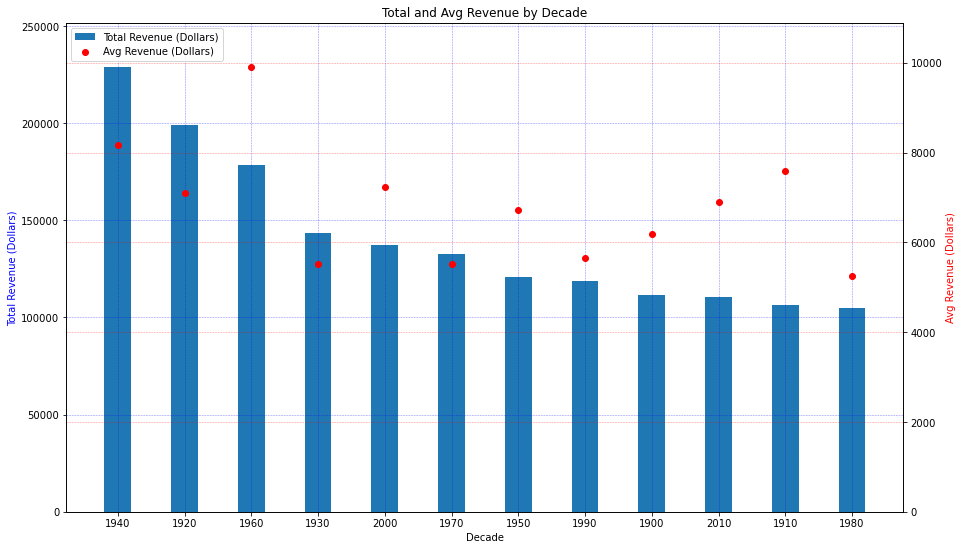

In [9]:
# Creating primary y-axis (total revenue)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.bar(agg_decade['DECADE'], agg_decade['TOTAL_REVENUE'], 
        width = 0.4, align='center', label='Total Revenue (Dollars)')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Total Revenue (Dollars)', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

# Creating secondary y-axis (avg revenue)
ax2 = ax1.twinx()
ax2.scatter(agg_decade['DECADE'], agg_decade['AVG_REVENUE'], 
         marker='o', color='red', label='Avg Revenue (Dollars)')
ax2.set_ylabel('Avg Revenue (Dollars)', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Setting the same y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.1*max(agg_decade['TOTAL_REVENUE']))
ax2.set_ylim(0, 1.1*max(agg_decade['AVG_REVENUE']))

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title('Total and Avg Revenue by Decade')

# Show the plot
plt.show()

In [10]:
# top 10 authors in bookshop
author_books = """
SELECT AUTHOR,
COUNT(TITLE) AS NUM_BOOKS,
SUM(REVENUE) AS TOTAL_REVENUE,
ROUND(AVG(REVENUE),0) AS AVG_REVENUE,
ROUND(AVG(RATING),2) AS AVG_RATING_PER_BOOK
FROM bookshop
GROUP BY AUTHOR
ORDER BY TOTAL_REVENUE DESC
LIMIT 10
"""

author_books = sqldf(author_books,locals())
author_books

,Author,NUM_BOOKS,TOTAL_REVENUE,AVG_REVENUE,AVG_RATING_PER_BOOK
0,Ava Mitchell,7,152386,21769.0,8.57
1,Emma Hayes,7,85135,12162.0,8.30
2,Liam Parker,5,83160,16632.0,8.44
3,Sophia Reynolds,7,82299,11757.0,8.27
4,Noah Foster,3,81170,27057.0,8.87
5,Ethan Lawson,3,55331,18444.0,8.87
6,Lucas Bennett,3,53248,17749.0,8.50
7,Olivia Hudson,2,51015,25508.0,8.95
8,Lily Cooper,7,44008,6287.0,8.31
9,Mia Campbell,2,35524,17762.0,8.65


In [11]:
result = bookshop.groupby('Author') \
                 .agg({
                     'Title': 'count',
                     'Revenue': ['sum', 'mean'],
                     'Rating': 'mean'
                 }) \
                 .reset_index()

result.columns = ['Author', 'Num_Books', 'Total_Revenue', 
                  'Avg_Revenue', 'Avg_Rating_per_Book']

# Sorting the result by 'TOTAL_REVENUE' in descending order
result = result.sort_values('Total_Revenue', ascending=False)

# Selecting the top 10 rows
result_top10 = result.head(10)

result_top10

,Author,Num_Books,Total_Revenue,Avg_Revenue,Avg_Rating_per_Book
20,Ava Mitchell,7,152386,21769.428571,8.571429
56,Emma Hayes,7,85135,12162.142857,8.300000
97,Liam Parker,5,83160,16632.000000,8.440000
151,Sophia Reynolds,7,82299,11757.000000,8.271429
124,Noah Foster,3,81170,27056.666667,8.866667
57,Ethan Lawson,3,55331,18443.666667,8.866667
105,Lucas Bennett,3,53248,17749.333333,8.500000
130,Olivia Hudson,2,51015,25507.500000,8.950000
100,Lily Cooper,7,44008,6286.857143,8.314286
117,Mia Campbell,2,35524,17762.000000,8.650000


In [12]:
agg_author = pd.DataFrame(author_books)

C:\Users\jlenehan\AppData\Local\Temp\ipykernel_5300\3439127178.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(agg_author['Author'], rotation=-45, ha='left')


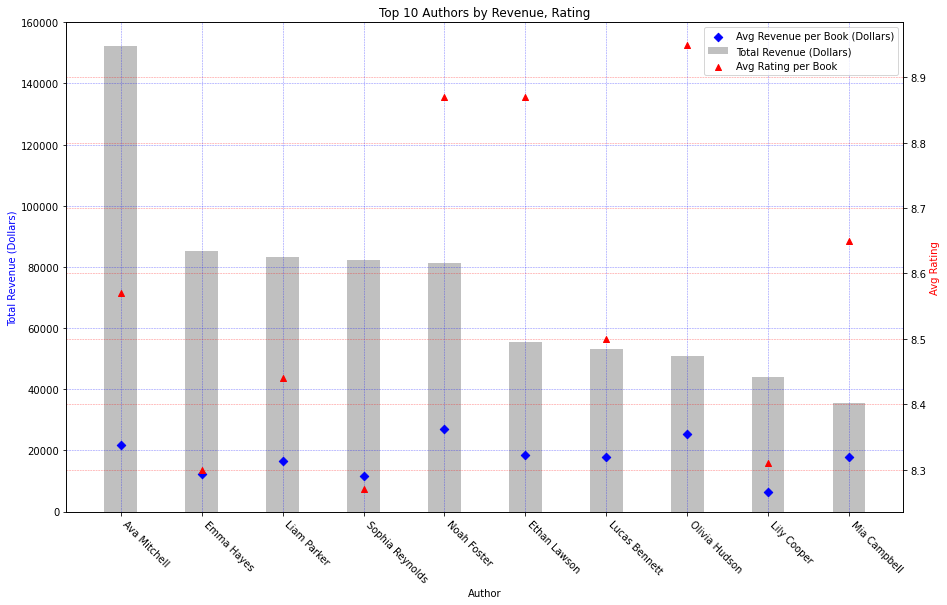

In [13]:
# Creating figure and axis
fig1, ax1 = plt.subplots(figsize=(15, 9))

#plotting bar chart of total votes
ax1.bar(agg_author['Author'], agg_author['TOTAL_REVENUE'], 
        width=0.4, align='center', color='silver', label='Total Revenue (Dollars)')
ax1.set_xlabel('Author')
ax1.set_xticklabels(agg_author['Author'], rotation=-45, ha='left')
ax1.set_ylabel('Total Revenue (Dollars)', color='blue')

# Adjusting gridlines on the primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

#creating scatter plot of avg votes
ax1.scatter(agg_author['Author'], agg_author['AVG_REVENUE'], 
         marker="D", color='blue', label='Avg Revenue per Book (Dollars)')

# Creating scatter plot of avg rating on secondary axis
ax2 = ax1.twinx()
ax2.scatter(agg_author['Author'], agg_author['AVG_RATING_PER_BOOK'], 
         marker='^', color='red', label='Avg Rating per Book')
ax2.set_ylabel('Avg Rating', color='red')

# Adjusting gridlines on the secondary y-axis
ax2.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Set title
plt.title('Top 10 Authors by Revenue, Rating')

# Show the plot
plt.show()

In [14]:
#build in percentile case when statement

pagelength_query = """
SELECT TITLE, REVENUE, NUMPAGES,
CASE
WHEN NUMPAGES < 318 THEN 'Quartile 1'
WHEN NUMPAGES BETWEEN 318 AND 375 THEN 'Quartile 2'
WHEN NUMPAGES BETWEEN 375 AND 438 THEN 'Quartile 3'
WHEN NUMPAGES > 438 THEN 'Quartile 4'
END AS PAGELENGTH_QUARTILE
FROM bookshop

ORDER BY REVENUE DESC
"""

pagelength_output = sqldf(pagelength_query,locals())
pagelength_output

,Title,Revenue,NumPages,PAGELENGTH_QUARTILE
0,Beneath the Surface,32941,456,Quartile 4
1,Whispers in the Mist,30978,426,Quartile 3
2,Midnight Secrets,30029,603,Quartile 4
3,Hidden in Plain Sight,28451,444,Quartile 4
4,Legacy of Stars,27009,534,Quartile 4
...,...,...,...,...
245,City of Secrets,528,267,Quartile 1
246,Whispers of the Forgotten Past,495,330,Quartile 2
247,Whispers of Desolation,447,414,Quartile 3
248,Sands of Echoes,435,330,Quartile 2


In [15]:
pagelength_output = pd.DataFrame(pagelength_output)

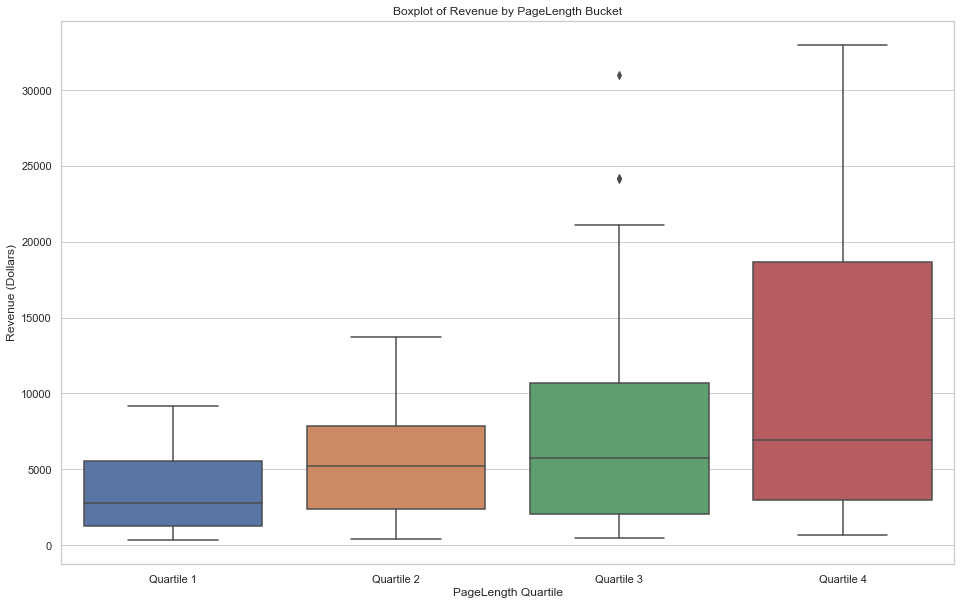

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

#Setting order of profit buckets
pagelength_bucket_order = ['Quartile 1', 'Quartile 2', 
                        'Quartile 3', 'Quartile 4']

# Create the boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='PAGELENGTH_QUARTILE', y='Revenue', 
            data=pagelength_output, order = pagelength_bucket_order, 
            showfliers=True)

# Add labels and title
plt.xlabel('PageLength Quartile')
plt.ylabel('Revenue (Dollars)')
plt.title('Boxplot of Revenue by PageLength Bucket')

# Show the plot
plt.show()